In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns

%matplotlib inline

In [2]:
# load the training and testing data set
path = "~/Data_Scientist/Kaggle/tweet-sentiment-extraction/"

train_df = pd.read_csv(path + "train.csv")
test_df = pd.read_csv(path + "test.csv")

In [3]:
# take a look at the shape of the 2 data sets
train_df.shape, test_df.shape

((27481, 4), (3534, 3))

In [4]:
# Preview the training set
train_df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [5]:
# Preview the testing set
test_df.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [6]:
# take a look of all setimemt types
train_df["sentiment"].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

Text(0.5, 1.0, 'Testing Set')

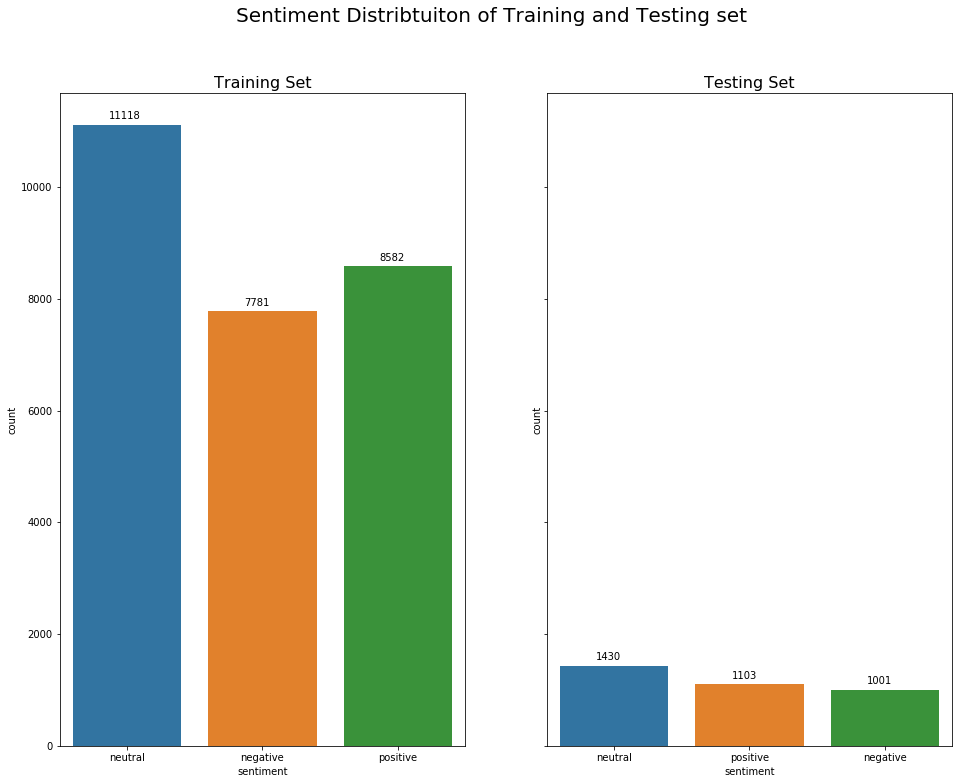

In [7]:
# plot the sentiment distribution for the training and testing sets
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(16,12)) # create a subplot and set the figure size
fig.suptitle("Sentiment Distribtuiton of Training and Testing set", fontsize=20) # set a bigger font size

# plot the distribution for the Training Set and Testing set
sns.countplot(x="sentiment", data =train_df, ax=axs[0]) 
sns.countplot(x="sentiment", data =test_df, ax=axs[1])

# annotate the percentage on top of each bar for both Training and Testing Set
for j in range(2):
    for i in axs[j].patches: 
        axs[j].text(i.get_x() + i.get_width()/3,           # set the text placement for x-axis
                i.get_height()+100,                        # set the text placement for y-axis
                i.get_height(),                            # set the value to show on top of each par
                color="black")                             # set the color to black

axs[0].set_title("Training Set", fontsize=16) # create the subtitle for the Training Set
axs[1].set_title("Testing Set", fontsize=16)  # create the subtitle for the Testing Set

1. The Training set has significantly more rows than the Testing Set. <br>
2. For both the Training and Testing Sets, there are more rows idenified as neutural. <br>

In [8]:
# look at an example for neutral text
train_df[train_df["sentiment"] == "neutral"]["text"].values[0]

' I`d have responded, if I were going'

In [9]:
# look at an example for neutral selected_text
train_df[train_df["sentiment"] == "neutral"]["selected_text"].values[0]

'I`d have responded, if I were going'

From the example above, it prompts me to think how many selected texts are identical to the text

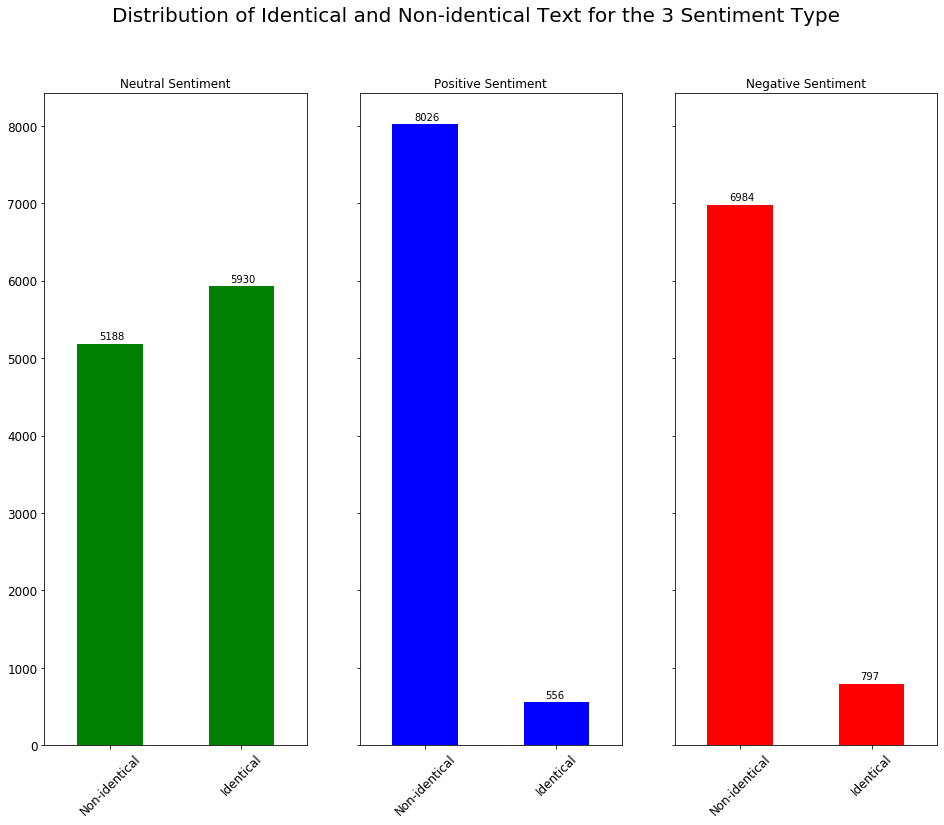

In [10]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16,12)) # create a subplot and set the figure size
fig.suptitle("Distribution of Identical and Non-identical Text for the 3 Sentiment Type", 
             fontsize=20) # set a bigger font size

# plot the distribution by using value_count function 
# to check how many selected texts that are identical with the original text

# Plot Neutral Sentiment on the left grid
(train_df[train_df["sentiment"] == "neutral"]["selected_text"] 
            == train_df[train_df["sentiment"] == "neutral"]
             ["text"]).value_counts(sort=False).plot(kind='bar', # need to put sort=False in value_counts()
                                                                 # the result will displace False first then True
                                           title="Neutral Sentiment",
                                           color="g",
                                           fontsize=12,
                                           ax=axs[0])

# Plot Positive Sentiment on the middle grid
(train_df[train_df["sentiment"] == "positive"]["selected_text"] 
            == train_df[train_df["sentiment"] == "positive"]
             ["text"]).value_counts().plot(kind='bar',
                                           title="Positive Sentiment",
                                           color="b",
                                           fontsize=12,
                                           ax=axs[1])

# Plot Negative Sentiment on the right grid
(train_df[train_df["sentiment"] == "negative"]["selected_text"] 
            == train_df[train_df["sentiment"] == "negative"]
             ["text"]).value_counts().plot(kind='bar',
                                           title="Negative Sentiment",
                                           color="r",
                                           fontsize=12,
                                           ax=axs[2])

# rename the xtick label for the 3 graphs for easier understanding
for i in range(3):
    plt.sca(axs[i])
    plt.xticks(range(2), ["Non-identical", "Identical"], rotation=45) # rotate the xtick label for 45 degree


# annotate the percentage on top of each bar for Training Set
for j in range(3):    
    for i in axs[j].patches: 
        axs[j].text(i.get_x() + i.get_width()/3,           # set the text placement for x-axis
                i.get_height()+50,                        # set the text placement for y-axis
                i.get_height(),                            # set the value to show on top of each par
                color="black")                             # set the color to black

In [11]:
# look at the first text from neutral sentiment
train_df[train_df["sentiment"] == "neutral"]["text"].iloc[0]

' I`d have responded, if I were going'

In [12]:
# look at the first selected_text from neutral sentiment
train_df[train_df["sentiment"] == "neutral"]["selected_text"].iloc[0]

'I`d have responded, if I were going'

text and selected_text look kind of similar...<br>
Let's try to strip all the white space in the text and submit the first result.

### First Submission to Kaggle Leaderboard on 11 May, 2020

By simply stripping all the white space from text and paste them as answers, <br>
I achieved a score of 0.594, which is not a bad start. <br>
However, I need to think about ways to improve the result. <br>

In [13]:
# convert the data type of the text column into String (seems like there is a row that has a float)
train_df["text"] = train_df.text.astype(str)
train_df["selected_text"] = train_df.selected_text.astype(str)

# strip all the white space from the text column
train_df["text"] = train_df["text"].apply(lambda x: x.strip())

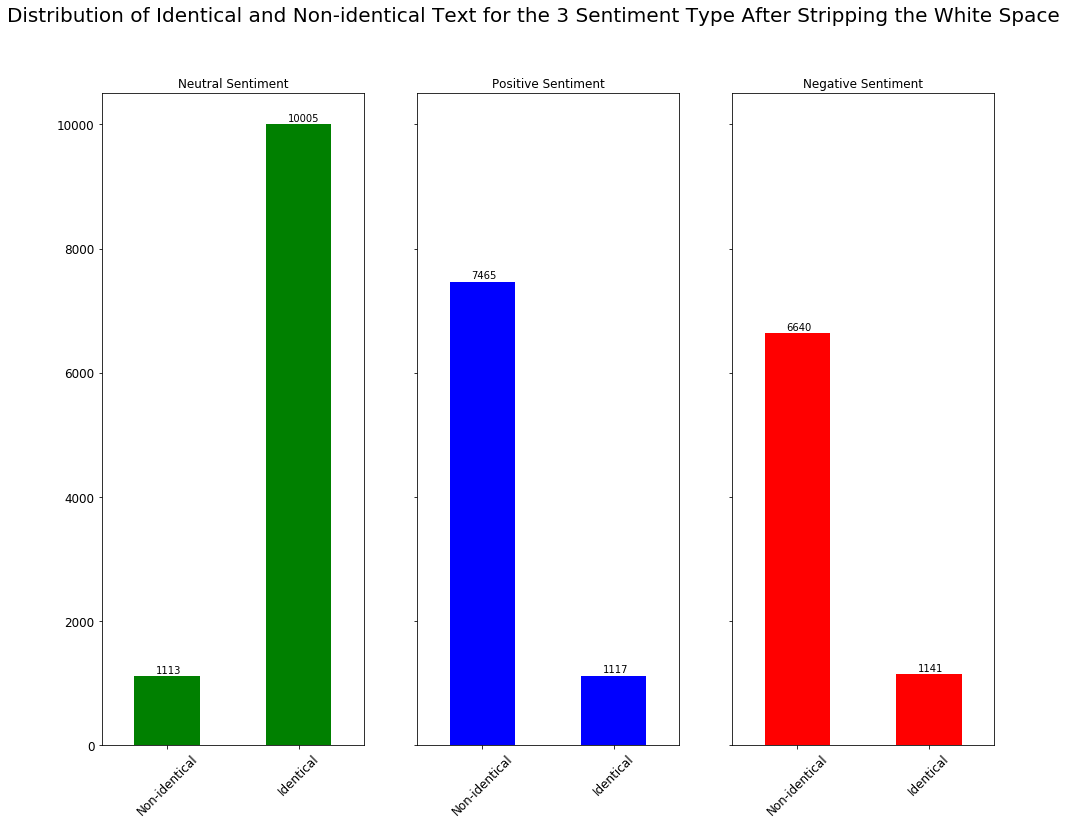

In [14]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16,12)) # create a subplot and set the figure size
fig.suptitle("Distribution of Identical and Non-identical Text for the 3 Sentiment Type After Stripping the White Space", 
             fontsize=20) # set a bigger font size

# plot the distribution by using value_count function 
# to check how many selected texts that are identical with the original text

# Plot Neutral Sentiment on the left grid
(train_df[train_df["sentiment"] == "neutral"]["selected_text"] 
            == train_df[train_df["sentiment"] == "neutral"]
             ["text"]).value_counts(sort=False).plot(kind='bar', # need to put sort=False in value_counts()
                                                                 # the result will displace False first then True
                                           title="Neutral Sentiment",
                                           color="g",
                                           fontsize=12,
                                           ax=axs[0])

# Plot Positive Sentiment on the middle grid
(train_df[train_df["sentiment"] == "positive"]["selected_text"] 
            == train_df[train_df["sentiment"] == "positive"]
             ["text"]).value_counts().plot(kind='bar',
                                           title="Positive Sentiment",
                                           color="b",
                                           fontsize=12,
                                           ax=axs[1])

# Plot Negative Sentiment on the right grid
(train_df[train_df["sentiment"] == "negative"]["selected_text"] 
            == train_df[train_df["sentiment"] == "negative"]
             ["text"]).value_counts().plot(kind='bar',
                                           title="Negative Sentiment",
                                           color="r",
                                           fontsize=12,
                                           ax=axs[2])

# rename the xtick label for the 3 graphs for easier understanding
for i in range(3):
    plt.sca(axs[i])
    plt.xticks(range(2), ["Non-identical", "Identical"], rotation=45) # rotate the xtick label for 45 degree


# annotate the percentage on top of each bar for Training Set
for j in range(3):    
    for i in axs[j].patches: 
        axs[j].text(i.get_x() + i.get_width()/3,           # set the text placement for x-axis
                i.get_height()+50,                         # set the text placement for y-axis
                i.get_height(),                            # set the value to show on top of each par
                color="black")                             # set the color to black

After stripping the white space, the number of identical text increases across all 3 sentiments. <br>
Neutral sentiment has an overwhelming high number of identical text and selected text.
Next, I will take a look how different the selected text and text are for positive and negative sentiment.

In [15]:
# the number of identical selected and text across all 3 sentiments after stripping white space
train_df["selected_text"].where(train_df["selected_text"].values==train_df["text"].values).notna().sum()

12263

In [16]:
# subset the dataset based on the sentiment
# Negative
negative = train_df[train_df["sentiment"] == "negative"]

# Positive
positive = train_df[train_df["sentiment"] == "positive"]

# Neutral
neutral = train_df[train_df["sentiment"] == "neutral"]

In [17]:
negative.iloc[2]

textID                               9642c003ef
text             what interview! leave me alone
selected_text                    leave me alone
sentiment                              negative
Name: 3, dtype: object

## 13 May, 2020

In [18]:
# take a look of the length of selected text and text for all 3 sentiments
train_df["text_length"] = train_df["text"].apply(lambda x: len(x.split(" ")))
train_df["selected_text_length"] = train_df["selected_text"].apply(lambda x: len(x.split(" ")))

In [19]:
# use the groupby function by grouping the sentiment
# then display the mean, max and min for the two columns

text_selected = train_df.groupby("sentiment")[["text_length", "selected_text_length"]].agg(["mean","max","min"])
text_selected

text_length          selected_text_length        
                 mean  max min                 mean max min
sentiment                                                  
negative    13.894101   38   1             4.021720  31   1
neutral     12.758320  100   1            12.443695  37   1
positive    13.595782   33   1             3.591937  32   1

Text(0.5, 1.0, 'Selected Text Length')

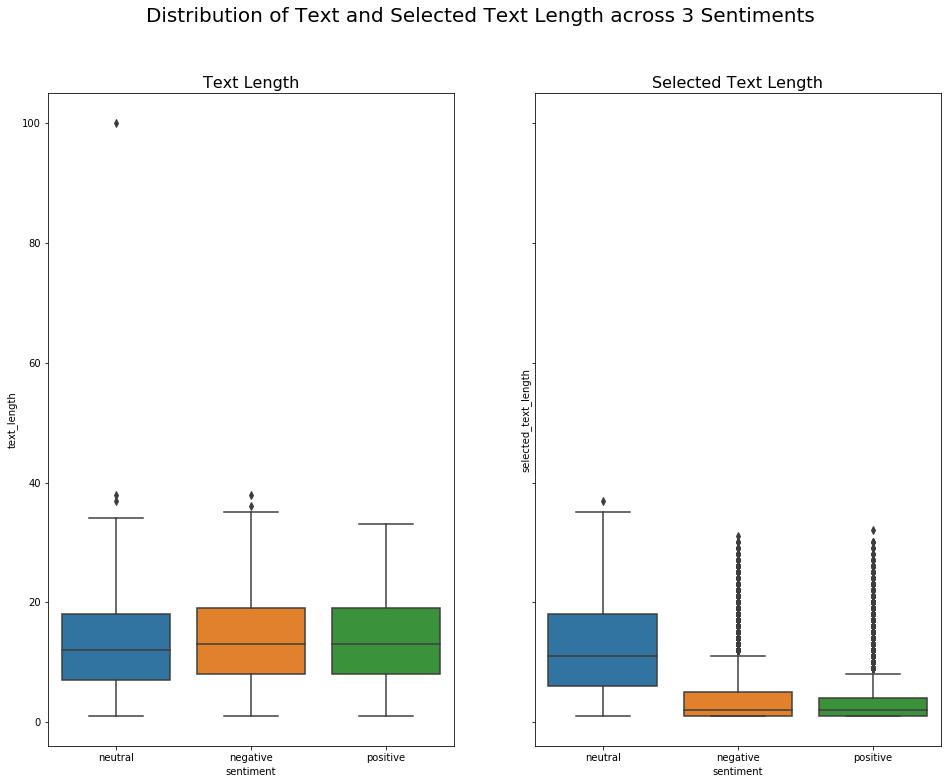

In [20]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(16,12)) # create a subplot and set the figure size
fig.suptitle("Distribution of Text and Selected Text Length across 3 Sentiments", 
             fontsize=20) # set a bigger font size

# draw the box and whisker plot for text length
sns.boxplot(x="sentiment", 
            y="text_length", 
            data=train_df,
            ax=axs[0])                                   # set it on the left handside
axs[0].set_title("Text Length", fontsize=16)             # set the subtitle of the plot

# draw the box and whisker plot for selected text length
sns.boxplot(x="sentiment", 
            y="selected_text_length", 
            data=train_df,
            ax=axs[1])                                   # set it on the right handside
axs[1].set_title("Selected Text Length", fontsize=16)    # set the subtitle of the plot

The outliner on the Neutral sentiment in the text length column distorted the scale of the y-axis. <br>
As most of the length is around 0 and 40, I will reset the y-axis and take a look of the plots once again.

[(0, 40)]

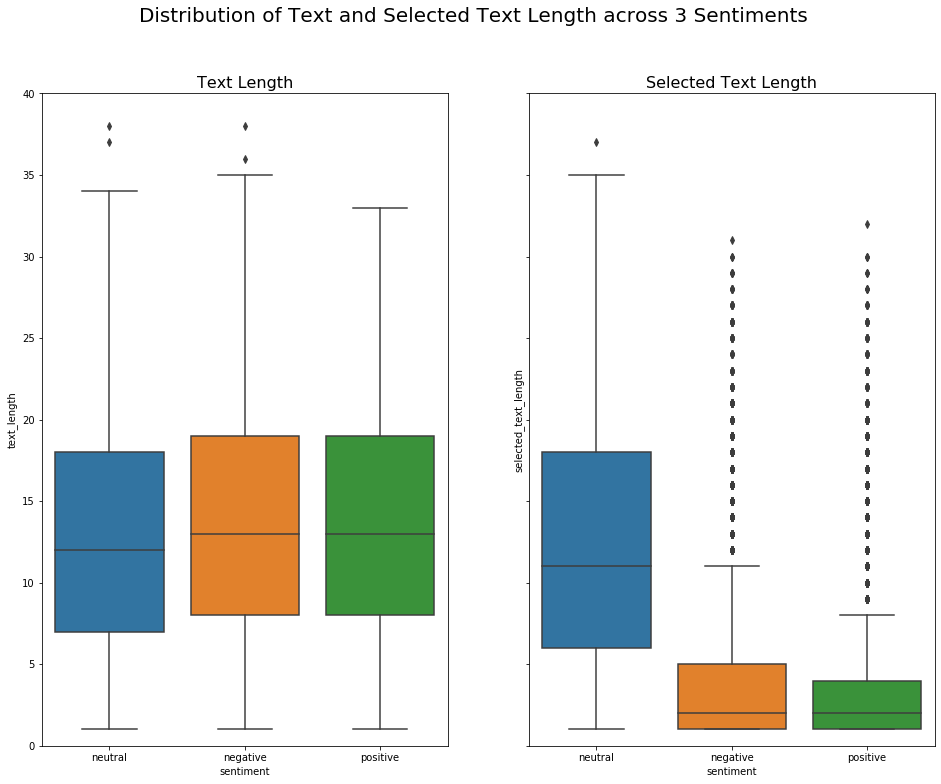

In [21]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(16,12)) # create a subplot and set the figure size
fig.suptitle("Distribution of Text and Selected Text Length across 3 Sentiments", 
             fontsize=20) # set a bigger font size

# draw the box and whisker plot for text length
sns.boxplot(x="sentiment", 
            y="text_length", 
            data=train_df,
            ax=axs[0])                                   # set it on the left handside
axs[0].set_title("Text Length", fontsize=16)             # set the subtitle of the plot
axs[0].set(ylim=(0, 40))                                 # reset the y-axis for text length

# draw the box and whisker plot for selected text length
sns.boxplot(x="sentiment", 
            y="selected_text_length", 
            data=train_df,
            ax=axs[1])                                   # set it on the right handside
axs[1].set_title("Selected Text Length", fontsize=16)    # set the subtitle of the plot
axs[1].set(ylim=(0, 40))                                 # reset the y-axis for selected text length

Text(0.5, 0, 'Average Length')

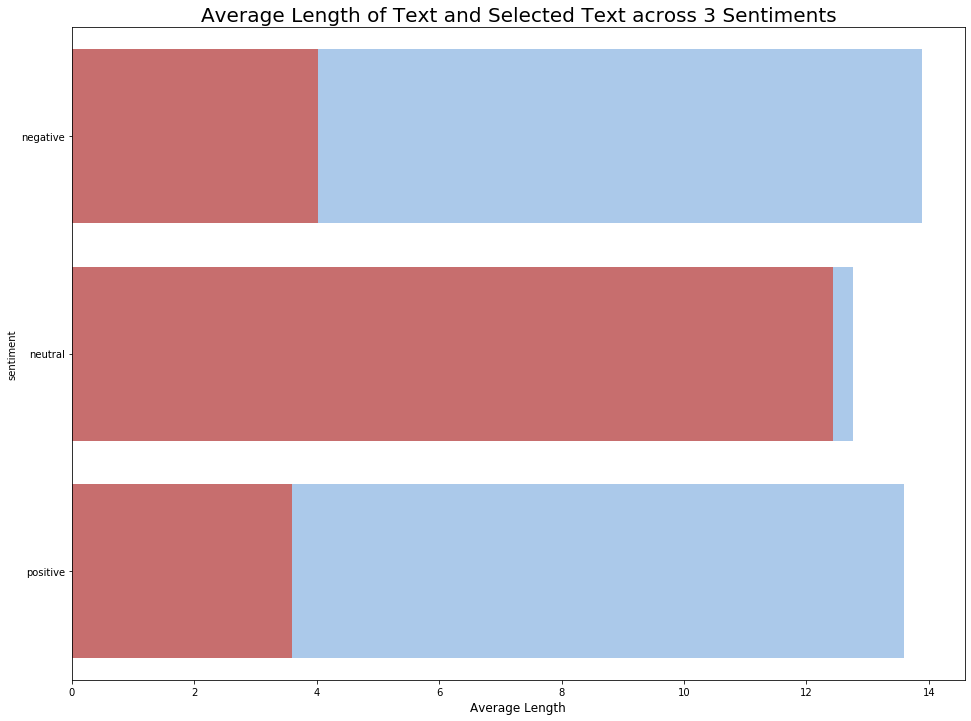

In [22]:
plt.figure(figsize=(16, 12))
plt.title("Average Length of Text and Selected Text across 3 Sentiments", fontsize=20)

# plot the average text length horizontally
sns.set_color_codes("pastel")
sns.barplot(y=text_selected.index,
            x=text_selected["text_length"]["mean"],
            data=text_selected,
            orient="h",                                         # display horizontal bars
            color="b")

# plot the average selected text length horizontally
sns.set_color_codes("muted")
sns.barplot(y=text_selected.index,
            x=text_selected["selected_text_length"]["mean"],
            data=text_selected,
            orient="h",                                          # display horizontal bars
            color="r")

plt.xlabel("Average Length", fontsize=12)                        # reset x label name

### Observations
1) Neutral Selected Texts tend to have longer average length. <br>
2) Positive and Negative Selected texts have shorter average size. <br>
3) If the text has a length of 1, the selected text will be identical to the text.

### To be continue...